#### Importando as bibliotecas que serão utilizadas

In [75]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

#### Leitura do DataSet

In [141]:
treino = pd.read_csv('/content/drive/MyDrive/DataSets/DataSetsKaggle/aug_train.csv')
#teste = pd.read_csv('/content/drive/MyDrive/DataSets/DataSetsKaggle/aug_test.csv')

treino.drop('enrollee_id', axis=1, inplace=True)
#teste.drop('enrollee_id', axis=1, inplace=True)

Features/ variáveis
 - enrollee_id : Unique ID for enrollee
 - city: City code
 - citydevelopmentindex: Developement index of the city (scaled)
 - gender: Gender of enrolee
 - relevent_experience: Relevent experience of enrolee
 - enrolled_university: Type of University course enrolled if any
 - education_level: Education level of enrolee
 - major_discipline :Education major discipline of enrolee
 - experience: Enrolee total experience in years
 - company_size: No of employees in current employer's company
 - company_type : Type of current employer
 - lastnewjob: Difference in years between previous job and current job
 - training_hours: training hours completed
 - target: 0 – Not looking for job change, 1 – Looking for a job change

In [77]:
treino.shape

(19158, 13)

In [78]:
#teste.shape

(2129, 12)

In [30]:
treino.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [31]:
teste.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [142]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.9+ MB


In [143]:
treino.describe().T

,count,mean,std,min,25%,50%,75%,max
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


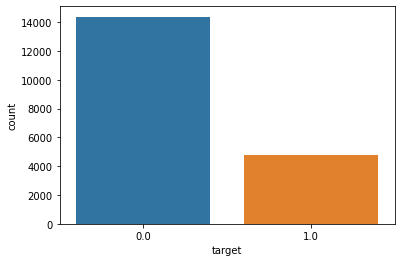

In [144]:
sns.countplot(data=treino, x='target')
plt.show()

##1) Missing Values

In [145]:
treino.isnull().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [80]:
missing = pd.DataFrame(treino.isnull().sum()/len(treino), columns=['Missing'])

cm = sns.light_palette("red", as_cmap=True)
missing.style.background_gradient(cmap=cm)

,Missing
city,0.000000
city_development_index,0.000000
gender,0.235306
relevent_experience,0.000000
enrolled_university,0.020148
education_level,0.024011
major_discipline,0.146832
experience,0.003393
company_size,0.309949
company_type,0.320493


In [18]:
treino.gender.value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [19]:
treino['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [20]:
treino['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [21]:
treino['major_discipline'].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [22]:
treino['experience'].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [23]:
treino['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [24]:
treino['company_type'].value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [25]:
treino['last_new_job'].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

###Lidando com missing values das variáveis categóricas

In [146]:
treino['company_size'] = treino['company_size'].replace('10/49', '10-49')

In [147]:
treino['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
10-49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [148]:
treino[['gender', 'company_type', 'major_discipline', 'enrolled_university', 'education_level',
        'experience', 'company_size', 'last_new_job']] = treino[['gender', 'company_type', 'major_discipline', 'enrolled_university', 'education_level',
        'experience', 'company_size', 'last_new_job']].fillna('No')

In [149]:
previsores = treino.iloc[:, 0:12 ].values
classe = treino.iloc[:, 12].values

In [150]:
previsores[:, 5]

array(['Graduate', 'Graduate', 'Graduate', ..., 'Graduate', 'High School',
       'Primary School'], dtype=object)

##2) Padronização das variáveis Numéricas

In [155]:
previsores[:5, 1]

array([0.92, 0.7759999999999999, 0.624, 0.789, 0.767], dtype=object)

In [156]:
scaler = StandardScaler()
previsores[:, [1, 11]] = scaler.fit_transform(previsores[:, [1, 11]])

##3) Codificação das variáveis Categóricas

### Variáveis Categóricas Ordinais
 - education_level
 - experience
 - company_size
 - last_new_job

In [157]:
Ordinal_encoder = OrdinalEncoder([
    ['No', 'Primary School',  'High School', 'Graduate', 'Masters', 'Phd'],
    'No,<1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,>20'.split(','),
    ['No','<10', '10-49', '50-99', '100-500', '500-999' ,'1000-4999', '5000-9999', '10000+'],
    ['No','1', '2', '3', '4', '>4', 'never']
])


# category_notNull_ordinal = category_notNull[['education_level', 'experience', 'company_size', 'last_new_job']]

previsores[:, [5, 7, 8, 10]] = Ordinal_encoder.fit_transform(previsores[:, [5, 7, 8, 10]])

In [99]:
previsores[:, 5]

array([3.0, 3.0, 3.0, ..., 3.0, 2.0, 1.0], dtype=object)

### Variáveis Categóricas Nominais
 - gender
 - company_type
 - major_discipline
 - enrolled_university
 - relevent_experience
 - city

In [158]:
labelencoder_previsores = LabelEncoder()
previsores[:, 0] = labelencoder_previsores.fit_transform(previsores[:, 0])
previsores[:, 2] = labelencoder_previsores.fit_transform(previsores[:, 2])
previsores[:, 3] = labelencoder_previsores.fit_transform(previsores[:, 2])
previsores[:, 4] = labelencoder_previsores.fit_transform(previsores[:, 4])
previsores[:, 6] = labelencoder_previsores.fit_transform(previsores[:, 6])
previsores[:, 9] = labelencoder_previsores.fit_transform(previsores[:, 9])


In [159]:
previsores[[0, 2, 3, 4, 6, 9]] = previsores[[0, 2, 3, 4, 6, 9]].astype('float64')

In [119]:
previsores[:, 2]

array([1.0, 1, 2.0, ..., 1, 1, 2], dtype=object)

In [160]:
onehotencoder = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [0, 2, 3, 4, 6, 9])],remainder='passthrough')
previsores = onehotencoder.fit_transform(previsores).toarray()

In [161]:
previsores.shape

(19158, 155)

### Dividindo os dados em Treinamento e Teste

In [178]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.2, random_state= 42, stratify=classe)

#### Previsão e Validação

In [186]:
from sklearn.ensemble import RandomForestClassifier
classificador = RandomForestClassifier(n_estimators=300, criterion='entropy', random_state=0)
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

In [190]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
acuracia = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)
#roc_score = roc_auc_score(classe_teste, previsoes)
#report = classification_report(classe_teste, previsoes)

In [191]:
acuracia

0.782098121085595

In [193]:
matriz

array([[2531,  346],
       [ 489,  466]])